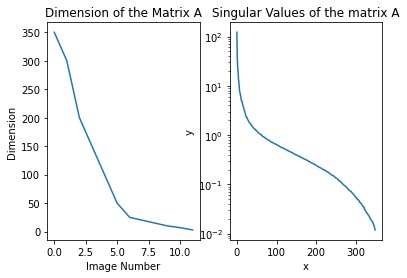

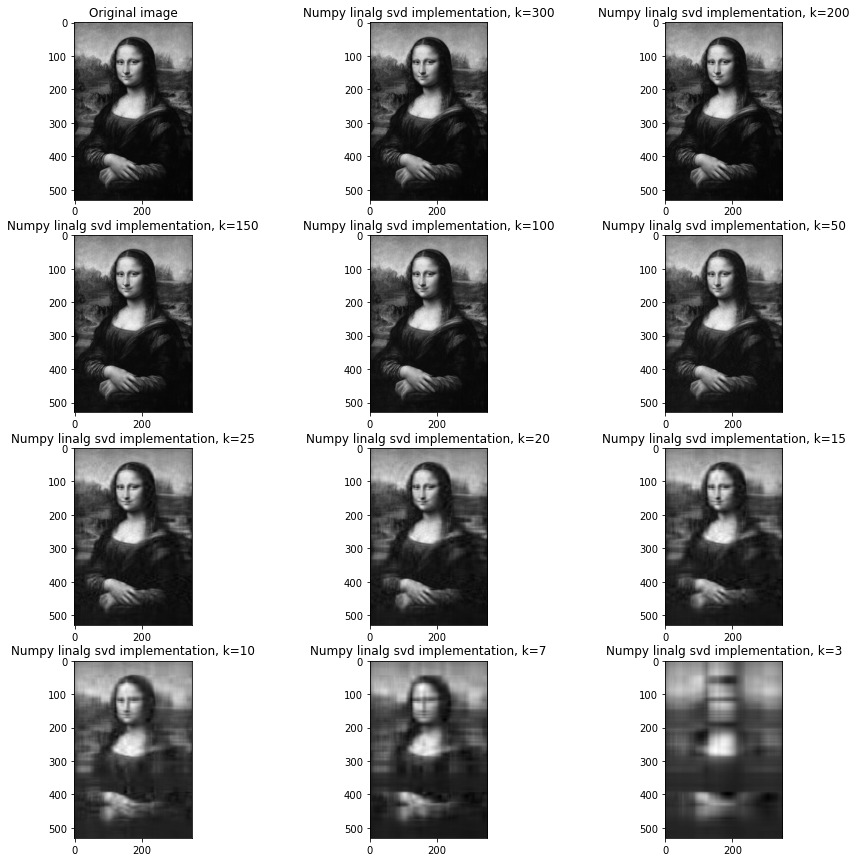

In [1]:
# -*- coding: utf-8 -*-
"""
Preparation DataLab:
    Code from https://www.kaggle.com/lorenzodenisi/svd-decomposition-and-applications
    Image from https://www.revolutiondatasystems.com/blog/grayscale-or-bitonal-which-is-a-better-method-for-scanning-my-records
"""

import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg
import math
import matplotlib.image as mpimg

def svd(A, tol=1e-5):
    #singular values and right singular vectors coming from eigenvalues and eigenvectors of A' x A
    eigs, V = linalg.eig(A.T.dot(A))

    #singular values are the square root of the eigenvalues
    sing_vals = np.sqrt(eigs)

    #sort both sigular values and right singular vector
    idx = np.argsort(sing_vals)

    sing_vals = sing_vals[idx[::-1]]
    V = V[:, idx[::-1]]

    #remove zero singular values below tol
    sing_vals_trunc = sing_vals[sing_vals>tol]
    V = V[:, sing_vals>tol]

    #is not necessary to store the entire sigma matrix, so only the diagonal is returned
    sigma = sing_vals_trunc

    #evaluate U matrix
    U = A @ V /sing_vals_trunc
    
    return U.real, sigma.real, V.T.real

def truncate(U, S, V, k):
    U_trunc = U[:, :k]
    S_trunc = S[:k]
    V_trunc = V[:k, :]
    return U_trunc, S_trunc, V_trunc

def im2double(im):
    info = np.iinfo(im.dtype)
    return im.astype(float)/info.max



# grayscale image (is still saved with 3 channels so I take the first one)
img = plt.imread("Mona_Lisa_GS.jpg")[:,:,0]



gray_channel = im2double(img)

#my implementation
U, S, V = svd(gray_channel)

#linalg library implementation
U_, S_, V_ = np.linalg.svd(gray_channel)

#number of singular values kept
k = [350,300,200,150,100,50,25,20,15,10,7,3]

# Plot the Singular Values and try to think about what this means for the quality of the compressed images
fig2 = plt.figure()

fig2.canvas.draw()
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

ax1.title.set_text(f"Dimension of the Matrix A")
ax1.set_xlabel(f"Image Number")
ax1.set_ylabel(f"Dimension")

ax2.title.set_text(f"Singular Values of the matrix A")
ax2.set_xlabel(f"x")
ax2.set_ylabel(f"y")

ax1.plot(k)
ax2.semilogy(S)


row_count = math.ceil(len(k)/3)
column_count = math.ceil(len(k)/row_count)

fig = plt.figure(figsize=(15,15))
plot_ = []
for i in range(len(k)):
    ax = plt.subplot(row_count, column_count, i+1)
    plot_.append(ax)

plt.ion()
for i in range(len(k)):
    fig.canvas.draw()

    U_trunc, S_trunc, Vt_trunc = truncate(U, S, V, k[i])
    _U_trunc, _S_trunc, _Vt_trunc = truncate(U_, S_, V_, k[i])
    
    my_channel = 255 * U_trunc @ np.diag(S_trunc) @ Vt_trunc
    linalg_channel = 255 * _U_trunc @ np.diag(_S_trunc) @ _Vt_trunc
    if i==0:
        plot_[i].title.set_text(f"Original image")
        plot_[i].imshow(gray_channel, cmap='gray')
    else:
        plot_[i].title.set_text(f"Numpy linalg svd implementation, k={k[i]}")
        plot_[i].imshow(linalg_channel, cmap='gray')

        




In the next step we will have a look at a colour picture. Colour pictures consist of 3 different matrixes. One of the three matrices contains the values of the colour red, one of the colour blue and one of the colour green (that's why the image is called RGB-image). The values range from 0 to 255. 

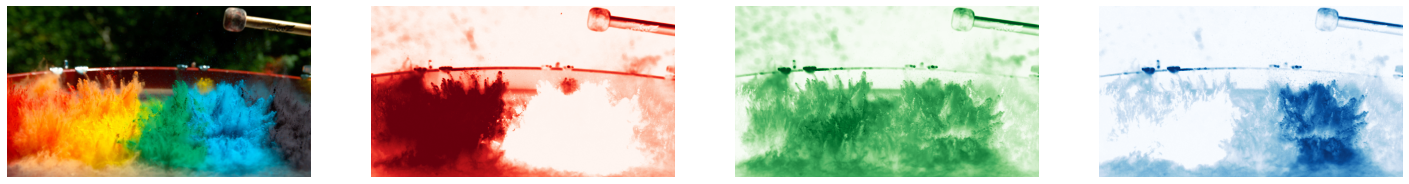

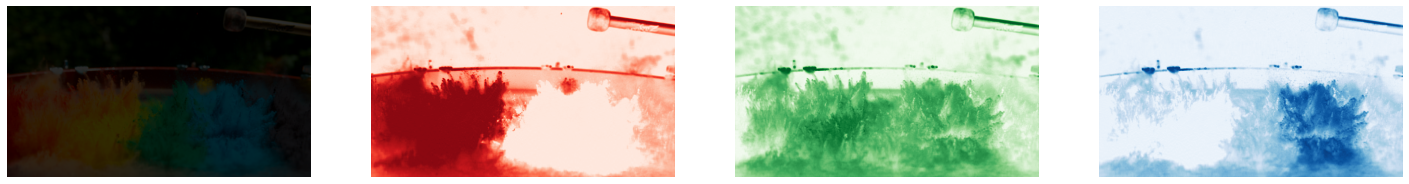

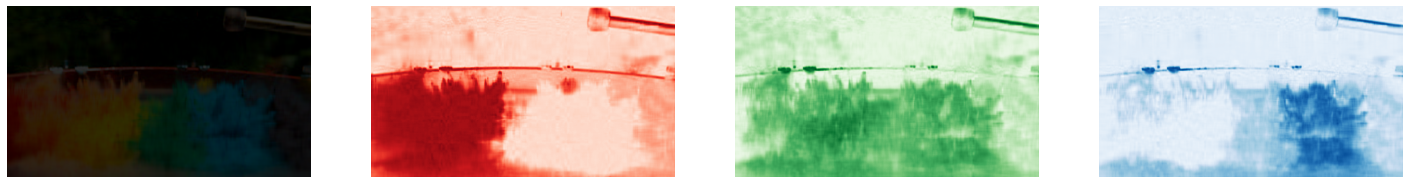

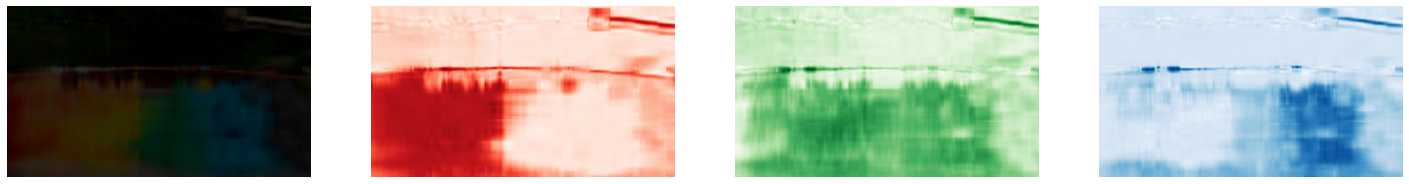

In [2]:
# http://www.math.utah.edu/~goller/F15_M2270/BradyMathews_SVDImage.pdf Idee und Theorie



#getting image channels
rgb_img = mpimg.imread("drumpowder.jpg")

red_channel = im2double(rgb_img[:, :, 0])
green_channel = im2double(rgb_img[:, :, 1])
blue_channel = im2double(rgb_img[:, :, 2])

#get SVD factorization
r_U, r_S, r_V = svd(red_channel)
g_U, g_S, g_V = svd(green_channel)
b_U, b_S, b_V = svd(blue_channel)

fig = plt.figure(figsize=(25,25))
plt.subplot(1,4,1)
plt.imshow(rgb_img)
plt.axis("off")
plt.subplot(1,4,2)
plt.imshow(red_channel,cmap='Reds')
plt.axis("off")
plt.subplot(1,4,3)
plt.imshow(green_channel,cmap='Greens')
plt.axis("off")
plt.subplot(1,4,4)
plt.imshow(blue_channel,cmap='Blues')

plt.axis("off")
plt.show()

#svd with different values for k 
k = 100

r_U_trunc, r_S_trunc, r_Vt_trunc = truncate(r_U, r_S, r_V, k)
g_U_trunc, g_S_trunc, g_Vt_trunc = truncate(g_U, g_S, g_V, k)
b_U_trunc, b_S_trunc, b_Vt_trunc = truncate(b_U, b_S, b_V, k)

r_new_channel = r_U_trunc @ np.diag(r_S_trunc) @ r_Vt_trunc
g_new_channel = g_U_trunc @ np.diag(g_S_trunc) @ g_Vt_trunc
b_new_channel = b_U_trunc @ np.diag(b_S_trunc) @ b_Vt_trunc

from astropy.visualization import make_lupton_rgb
image = make_lupton_rgb(r_new_channel, g_new_channel, b_new_channel)

fig2 = plt.figure(figsize=(25,25))
plt.subplot(1,4,1)
plt.imshow(image)
plt.axis("off")
plt.subplot(1,4,2)
plt.imshow(r_new_channel,cmap='Reds')
plt.axis("off")
plt.subplot(1,4,3)
plt.imshow(g_new_channel,cmap='Greens')
plt.axis("off")
plt.subplot(1,4,4)
plt.imshow(b_new_channel,cmap='Blues')

plt.axis("off")
plt.show()


k = 25

r_U_trunc, r_S_trunc, r_Vt_trunc = truncate(r_U, r_S, r_V, k)
g_U_trunc, g_S_trunc, g_Vt_trunc = truncate(g_U, g_S, g_V, k)
b_U_trunc, b_S_trunc, b_Vt_trunc = truncate(b_U, b_S, b_V, k)

r_new_channel = r_U_trunc @ np.diag(r_S_trunc) @ r_Vt_trunc
g_new_channel = g_U_trunc @ np.diag(g_S_trunc) @ g_Vt_trunc
b_new_channel = b_U_trunc @ np.diag(b_S_trunc) @ b_Vt_trunc

from astropy.visualization import make_lupton_rgb
image = make_lupton_rgb(r_new_channel, g_new_channel, b_new_channel)

fig3 = plt.figure(figsize=(25,25))
plt.subplot(1,4,1)
plt.imshow(image)
plt.axis("off")
plt.subplot(1,4,2)
plt.imshow(r_new_channel,cmap='Reds')
plt.axis("off")
plt.subplot(1,4,3)
plt.imshow(g_new_channel,cmap='Greens')
plt.axis("off")
plt.subplot(1,4,4)
plt.imshow(b_new_channel,cmap='Blues')

plt.axis("off")
plt.show()



#get SVD factorization
k = 10

r_U_trunc, r_S_trunc, r_Vt_trunc = truncate(r_U, r_S, r_V, k)
g_U_trunc, g_S_trunc, g_Vt_trunc = truncate(g_U, g_S, g_V, k)
b_U_trunc, b_S_trunc, b_Vt_trunc = truncate(b_U, b_S, b_V, k)

r_new_channel = r_U_trunc @ np.diag(r_S_trunc) @ r_Vt_trunc
g_new_channel = g_U_trunc @ np.diag(g_S_trunc) @ g_Vt_trunc
b_new_channel = b_U_trunc @ np.diag(b_S_trunc) @ b_Vt_trunc

from astropy.visualization import make_lupton_rgb
image = make_lupton_rgb(r_new_channel, g_new_channel, b_new_channel)

fig4 = plt.figure(figsize=(25,25))
plt.subplot(1,4,1)
plt.imshow(image)
plt.axis("off")
plt.subplot(1,4,2)
plt.imshow(r_new_channel,cmap='Reds')
plt.axis("off")
plt.subplot(1,4,3)
plt.imshow(g_new_channel,cmap='Greens')
plt.axis("off")
plt.subplot(1,4,4)
plt.imshow(b_new_channel,cmap='Blues')

plt.axis("off")
plt.show()

We now truncated the same amount of singular values for each color. Is there a way to do this in a more "scientific" way? Try to have a look at the singular values for each color and think about truncating a different amount of singular values for each colour.

Text(0.5, 1.0, 'SV Blue Image')

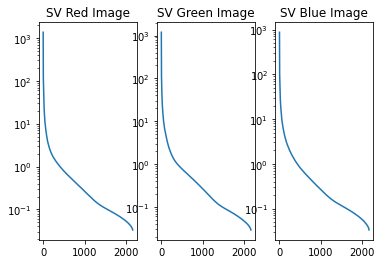

In [5]:
fig5 = plt.figure()
plt.subplot(1,3,1)
plt.semilogy(r_S)
plt.title(f"SV Red Image")
plt.subplot(1,3,2)
plt.semilogy(g_S)
plt.title(f"SV Green Image")
plt.subplot(1,3,3)
plt.semilogy(b_S)
plt.title(f"SV Blue Image")

Schlechtes Bild hierfür :D